<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Import-and-Analysis" data-toc-modified-id="Import-and-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and Analysis</a></span><ul class="toc-item"><li><span><a href="#Dataset-description:" data-toc-modified-id="Dataset-description:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dataset description:</a></span></li></ul></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Administrative_duration" data-toc-modified-id="Administrative_duration-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Administrative_duration</a></span></li><li><span><a href="#BounceRates" data-toc-modified-id="BounceRates-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>BounceRates</a></span></li><li><span><a href="#OperatingSystems" data-toc-modified-id="OperatingSystems-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>OperatingSystems</a></span></li><li><span><a href="#Weekend" data-toc-modified-id="Weekend-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Weekend</a></span></li><li><span><a href="#Kristina:" data-toc-modified-id="Kristina:-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>Kristina:</a></span><ul class="toc-item"><li><span><a href="#Informational" data-toc-modified-id="Informational-3.0.5.1"><span class="toc-item-num">3.0.5.1&nbsp;&nbsp;</span>Informational</a></span></li><li><span><a href="#Exit-Rates" data-toc-modified-id="Exit-Rates-3.0.5.2"><span class="toc-item-num">3.0.5.2&nbsp;&nbsp;</span>Exit Rates</a></span></li><li><span><a href="#Browser" data-toc-modified-id="Browser-3.0.5.3"><span class="toc-item-num">3.0.5.3&nbsp;&nbsp;</span>Browser</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-3.0.5.4"><span class="toc-item-num">3.0.5.4&nbsp;&nbsp;</span>Revenue</a></span></li></ul></li><li><span><a href="#Isaac:" data-toc-modified-id="Isaac:-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>Isaac:</a></span></li><li><span><a href="#Pau:" data-toc-modified-id="Pau:-3.0.7"><span class="toc-item-num">3.0.7&nbsp;&nbsp;</span>Pau:</a></span></li><li><span><a href="#Sosa:" data-toc-modified-id="Sosa:-3.0.8"><span class="toc-item-num">3.0.8&nbsp;&nbsp;</span>Sosa:</a></span></li></ul></li></ul></li></ul></div>

In [52]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


# Functions

In [2]:
## Function to explain NA values in a column:

def NA_values(series):
    '''
    Function that takes a Pandas Series and returns a print statement explaining NAs and % of the column
    '''
    
    return print(f'Column name: {series.name}\nTotal values: {int(series.count())}\nNA values: {series.isna().sum()}\n% of NA values: {round(series.isna().mean() * 100,2)}%')

In [69]:
## Function to get the information about the outliers of a column:

def iqr(dataset, series):
    """
    Function takes dataset and column and returns the information about the outliers.
    """
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    total_outliers = len(dataset.loc[(series > upper) | (series < lower)])
    percent_outliers = total_outliers / len(dataset) * 100
    
    return print(f'Column: {series.name}\nLower outliers: all values lower than {round(lower, 3)}\nUpper outliers: all values higher than {round(upper, 3)}\nTotal number of rows with outliers: {total_outliers}\n% of outliers: {round(percent_outliers, 2)}%')

# Import and Analysis

In [4]:
data = pd.read_csv('data/online_shoppers_intention_DATAPTDIC19.csv', sep=',', index_col=0)

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1.0,1,1.0,Returning_Visitor,0.0,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2.0,1,2.0,Returning_Visitor,0.0,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1.0,9,3.0,Returning_Visitor,0.0,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2.0,2,4.0,Returning_Visitor,0.0,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3.0,1,4.0,Returning_Visitor,1.0,False


In [6]:
data.shape

(12330, 18)

In [7]:
data.shape

(12330, 18)

In [8]:
data.describe()

,Administrative,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Browser,TrafficType
count,12296.000000,12316.000000,12196.000000,12316.000000,12216.000000,12316.000000,12330.000000,12230.000000,12210.000000
mean,10.428351,0.503979,31.739259,1196.037057,0.027052,0.043003,0.061427,2.350613,4.062899
std,89.580739,1.270701,44.468360,1914.372511,0.129758,0.048527,0.198917,1.720863,4.016304
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,2.000000,2.000000
50%,1.000000,0.000000,18.000000,599.766190,0.003175,0.025124,0.000000,2.000000,2.000000
75%,4.000000,0.000000,38.000000,1466.479902,0.017027,0.050000,0.000000,2.000000,4.000000
max,999.000000,24.000000,705.000000,63973.522230,3.000000,0.200000,1.000000,13.000000,20.000000


In [9]:
data.describe()

,Administrative,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Browser,TrafficType
count,12296.000000,12316.000000,12196.000000,12316.000000,12216.000000,12316.000000,12330.000000,12230.000000,12210.000000
mean,10.428351,0.503979,31.739259,1196.037057,0.027052,0.043003,0.061427,2.350613,4.062899
std,89.580739,1.270701,44.468360,1914.372511,0.129758,0.048527,0.198917,1.720863,4.016304
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,2.000000,2.000000
50%,1.000000,0.000000,18.000000,599.766190,0.003175,0.025124,0.000000,2.000000,2.000000
75%,4.000000,0.000000,38.000000,1466.479902,0.017027,0.050000,0.000000,2.000000,4.000000
max,999.000000,24.000000,705.000000,63973.522230,3.000000,0.200000,1.000000,13.000000,20.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12296 non-null float64
Administrative_Duration    12316 non-null object
Informational              12316 non-null float64
Informational_Duration     12316 non-null object
ProductRelated             12196 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12216 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12310 non-null object
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null object
Browser                    12230 non-null float64
Region                     12230 non-null object
TrafficType                12210 non-null float64
VisitorType                12310 non-null object
Weekend                    12310 non-null object
Revenue                    12330 non-null bool
dt

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12296 non-null float64
Administrative_Duration    12316 non-null object
Informational              12316 non-null float64
Informational_Duration     12316 non-null object
ProductRelated             12196 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12216 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12310 non-null object
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null object
Browser                    12230 non-null float64
Region                     12230 non-null object
TrafficType                12210 non-null float64
VisitorType                12310 non-null object
Weekend                    12310 non-null object
Revenue                    12330 non-null bool
dt

## Dataset description:
 - Administrative:`float`. Administrative Value. `yet to identify`.
 - Administrative_Duration: `object`. Duration in Administrative Page. `Identify values and change dtype accordingly.`. 
 - Informational: `float`. Informational Value. `yet to identify` 
 - Informational_Duration: `object`. Duration in Informational Page. `Identify values and change dtype accordingly.`
 - ProductRelated: `float.` Product Related Value. `yet to identify` 
 - ProductRelated_Duration: `object`. Duration in Product Related Page. `Identify values and change dtype accordingly.` 
 - BounceRates: `float`. Bounce Rates of a web page. Percentages. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
 - ExitRates: `float`. Exit rate of a web page. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
 - PageValues: `object`. Page values of each web page. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. `Identify values and change dtype accordingly.` 
 - SpecialDay: Special days like valentine etc. `float`. Closeness to a special date. `dtype correct`. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
 - Month: Month of the year. `object`. String to identify the month of the year. `clean`. 
 - OperatingSystems: Operating system used. `float`. `Try to explain the values`. 
 - Browser: Browser used. `integer` 
 - Region: Region of the user. `integer`. 
 - TrafficType: Traffic Type. `integer`.  
 - VisitorType: Types of Visitor `object` 
 - Weekend: Weekend or not `bool`  
 - Revenue: Revenue will be generated or not `object`. `Should be bool` 
     

# Data cleaning

### Administrative_duration

- Data type: Categorical, ´object´. Necessary change to float.
- There are some values with multiple dots. Necessary to delete these dots.
- Missing Values: There are 14 missing values, which is 0.11% out of all data. Will fill this cells with median
- 47.5% of sessions are coming from the category 0.0 of the Administrative_Duration

In [12]:
# Missing values

NA_values(data.Administrative_Duration)

Column name: Administrative_Duration
Total values: 12316
NA values: 14
% of NA values: 0.11%


In [56]:
# Fixing problems
# Drop dots from cells


0.0                   5805
-99                    100
4.0                     56
5.0                     53
7.0                     44
                      ... 
595.1                    1
121.16666670000001       1
377.0                    1
889.1666667000002        1
121.5                    1
Name: Administrative_Duration, Length: 3310, dtype: int64


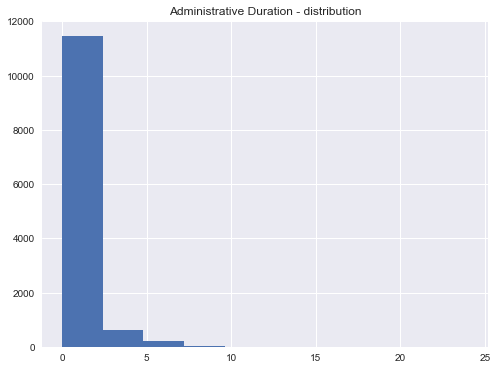

In [14]:
# Distribution

print(data.Administrative_Duration.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("Administrative Duration - distribution")
plt.show()


In [15]:
percent_info_0 = data.Administrative_Duration.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category 0.0 of the Administrative_Duration pages: {round(percent_info_0,1)}')

% of sessions in the category 0.0 of the Administrative_Duration pages: 47.1


### BounceRates

- Data type: Numerical, ‘float‘. Dtype change not necessary.
- Missing Values: There are 14 missing values, which is 0.11% out of all data. Will fill this cells with median
- 44.7% of sessions are coming from the category 0.0 of the BounceRates

In [16]:
# Missing values

NA_values(data.BounceRates)

Column name: BounceRates
Total values: 12216
NA values: 114
% of NA values: 0.92%


0.000000    5446
0.200000     691
0.066667     134
0.028571     114
0.050000     111
            ... 
0.024872       1
0.006409       1
0.014198       1
0.056667       1
0.012005       1
Name: BounceRates, Length: 1860, dtype: int64


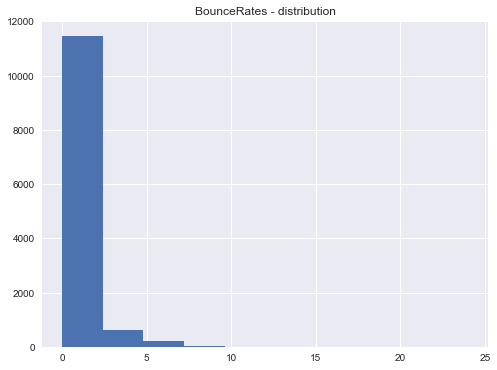

In [17]:
# Distribution

print(data.BounceRates.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("BounceRates - distribution")
plt.show()

In [18]:
percent_info_0 = data.BounceRates.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category 0.0 of the BounceRates pages: {round(percent_info_0,1)}')

% of sessions in the category 0.0 of the BounceRates pages: 44.2


### OperatingSystems

In [19]:
# checking the no. of OSes each user is having??

- Data type: Numerical, ‘float‘. Dtype change not necessary.
- Missing Values: There are 1 missing values, which is 0.01% out of all data. Will fill this cell with median
- 53.4% of sessions are coming from the category 2.0 of the OperatingSystems

In [20]:
# Missing values

NA_values(data.OperatingSystems)

Column name: OperatingSystems
Total values: 12330
NA values: 0
% of NA values: 0.0%


In [ ]:
# transform 999 and ? to NaN

data.OperatingSystems.fillna(method= 'ffill')

2       6542
1       2556
3       2531
4        471
-999      99
8         79
?         20
6         19
7          7
5          6
Name: OperatingSystems, dtype: int64


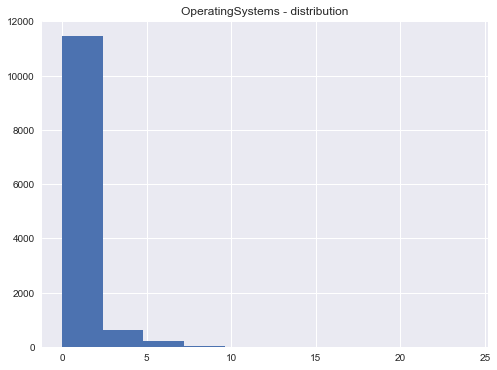

In [21]:
print(data.OperatingSystems.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("OperatingSystems - distribution")
plt.show()

In [22]:
percent_info_2 = data.OperatingSystems.value_counts()[2]/len(data)*100  
print(f'% of sessions in the category 2.0 of the OperatingSystems pages: {round(percent_info_2,1)}')

% of sessions in the category 2.0 of the OperatingSystems pages: 20.5


### Weekend

- Data type: Bool. Dtype change not necessary.
- Missing Values: There are no missing values.
- 76.7% of sessions are coming from the category False of the Weekend

In [23]:
# Missing values

NA_values(data.Weekend)

Column name: Weekend
Total values: 12310
NA values: 20
% of NA values: 0.16%


In [ ]:
print(data.Weekend.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax = data.Informational.hist()
plt.title("Weekend - distribution")
plt.show()

In [25]:
percent_info_false = data.Weekend.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category False of the Weekend pages, not in weekend: {round(percent_info_0,1)}')

% of sessions in the category False of the Weekend pages, not in weekend: 44.2


### Kristina:

 - **Informational**
  - Data type: Categorical, float. No changes
  - Missing Values: There are 14 missing values, which is 0.11% out of all data. It will be filled with the median
  - 78.7% of sessions are coming from the category 0.0 of the Informational pages
  - No other changes are needed
 - **ExitRates**
  - Data type: Numerical, float. No changes
  - Missing Values: There are 14 missing values, which is 0.11% out of all data. It will be filled with the median
  - Outliers: There are 1094 outliers, which is 8.87% of all data. The majority of the outliers are falling under the FALSE revenue category and under the 0.2 value of the Exit rates. Additional column will be created to be able to filter out the outliers if needed: exitrates_outliers (boolean values).
 - **Browser**
  - Data type: Categorical, integer. No changes
  - Missing Values: There are no missing values
  - The most popular browser is 2. The usage share is very similar to the standard Usage share of all browsers. Later on, in the data visualization, we will show more insights on this
  - No other changes are needed
 - **Revenue**
  - Data type: categorical, object. Will change to boolean
  - There are 4 categories, will unify the data to have only TRUE and FALSE
  - 84.53% of data falls under FALSE category of Revenue. Since it's a target column, the data will need to be equilibrated.

#### Informational

Column name: Informational
Total values: 12316
NA values: 14
% of NA values: 0.11%
0.0     9700
1.0     1041
2.0      727
3.0      380
4.0      222
5.0       99
6.0       78
7.0       36
9.0       15
8.0       14
10.0       7
12.0       5
14.0       2
11.0       1
16.0       1
24.0       1
13.0       1
Name: Informational, dtype: int64


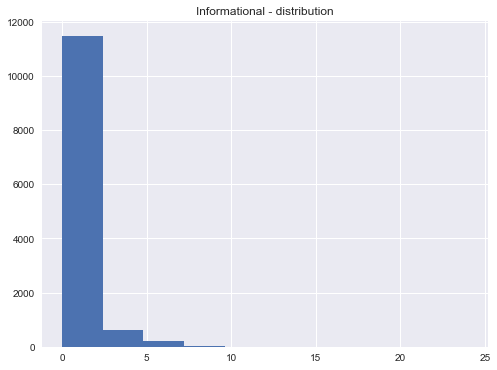

% of sessions in the category 0.0 of the Informational pages: 78.7


In [26]:
# Missing values

NA_values(data.Informational)

# Filling missing values

data.Informational = data.Informational.fillna(data.Informational.median())

# Distribution

print(data.Informational.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("Informational - distribution")
plt.show()

# % of sessions in category 0.0 

percent_info_0 = data.Informational.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category 0.0 of the Informational pages: {round(percent_info_0,1)}')

#### Exit Rates

Column name: ExitRates
Total values: 12316
NA values: 14
% of NA values: 0.11%


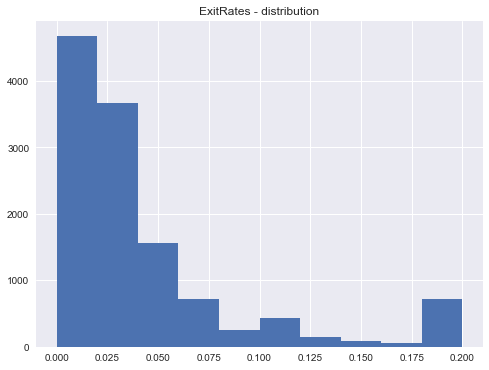

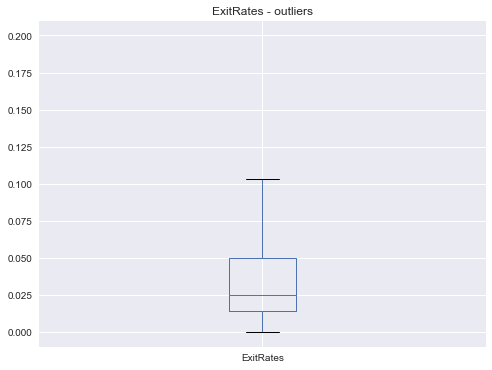

Column: ExitRates    nLower outliers: all values lower than -0.039    nUpper outliers: all values higher than 0.104    nTotal number of rows with outliers: 1094    n% of outliers: 8.87%
False    1087
True        6
Name: Revenue, dtype: int64
0.200000    706
0.133333     67
0.150000     59
0.166667     25
0.120000     23
           ... 
0.106207      1
0.105556      1
0.142424      1
0.131944      1
0.121212      1
Name: ExitRates, Length: 90, dtype: int64


In [27]:
# Missing values

NA_values(data.ExitRates)

# Filling missing values

data.ExitRates = data.ExitRates.fillna(data.ExitRates.median())

# Distribution

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax1 = data.ExitRates.hist()
plt.title("ExitRates - distribution")
plt.show()

# Outliers

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax1 = data.boxplot('ExitRates')
plt.title("ExitRates - outliers")
plt.show()

iqr(data, data.ExitRates)

# Checking the distribution of outliers regarding the target column - Revenue

exitrates_outliers = data.loc[(data.ExitRates > 0.104) | (data.ExitRates < -0.039)]
print(exitrates_outliers.Revenue.value_counts())

# Checking the top exit rate values of the outliers:

print(exitrates_outliers.ExitRates.value_counts())

# Creating a new column in the dataset to indicate exit rate outliers:
# Only using the upper IQR because the lower is a negative value and we don't have values lower tahn 0.

data['exitrates_outliers']  = data['ExitRates'].apply(lambda x: 'TRUE' if x > 0.104 else 'FALSE')

# Converting column to boolean

mapa = {'TRUE': True, 'FALSE': False}
data['exitrates_outliers'] = data['exitrates_outliers'].map(mapa)

#### Browser

Column name: Browser
Total values: 12230
NA values: 100
% of NA values: 0.81%
 2.0     64.488962
 1.0     19.942764
 4.0      5.960752
 5.0      3.785773
 6.0      1.414554
 10.0     1.316435
 8.0      1.079313
 3.0      0.825838
 13.0     0.498774
 7.0      0.384301
-1.0      0.163532
 12.0     0.081766
 11.0     0.049060
 9.0      0.008177
Name: Browser, dtype: float64


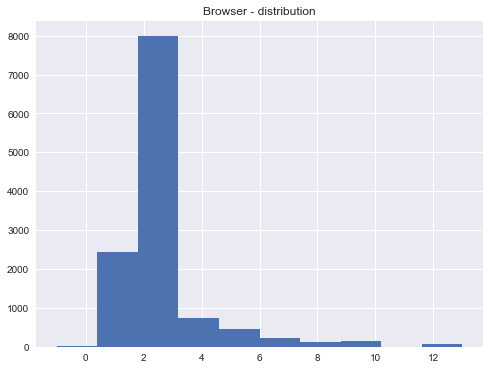

                  standard_usage_all
Chrome                         64.92
Safari                         15.97
Firefox                         4.33
Samsung_Internet                3.29
UC                              2.94
Opera                           2.34
Edge                            2.05
IE                              1.98
AOSP                            0.59
Others                          1.59
                  standard_usage_mobile
Chrome                            63.80
Safari                            19.70
Firefox                            0.35
Samsung_Internet                   6.27
UC                                 5.33
Opera                              2.48
Others                             2.07


In [28]:
# Missing values

NA_values(data.Browser)

# Distribution

print(data.Browser.value_counts(normalize = True)*100) 

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax1 = data.Browser.hist()
plt.title("Browser - distribution")
plt.show()

# Creating a dataset of the standard usage share of all browsers and of mobile browsers

usage_share_browsers = pd.DataFrame({'Chrome': 64.92, 'Safari': 15.97, 'Firefox': 4.33, 'Samsung_Internet': 3.29, 
                                     'UC': 2.94, 'Opera': 2.34, 'Edge': 2.05, 'IE': 1.98, 'AOSP': 0.59, 'Others': 1.59}, 
                                    index = [0]).T
colnames = ['standard_usage_all']
usage_share_browsers.columns = colnames
print(usage_share_browsers)

usage_share_browsers_mob = pd.DataFrame({'Chrome': 63.80, 'Safari': 19.70, 'Firefox': 0.35, 'Samsung_Internet': 6.27, 
                                     'UC': 5.33, 'Opera': 2.48, 'Others': 2.07}, 
                                    index = [0]).T
colnames = ['standard_usage_mobile']
usage_share_browsers_mob.columns = colnames
print(usage_share_browsers_mob)

#### Revenue

Column name: Revenue
Total values: 12330
NA values: 0
% of NA values: 0.0%
False    10422
True      1908
Name: Revenue, dtype: int64


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

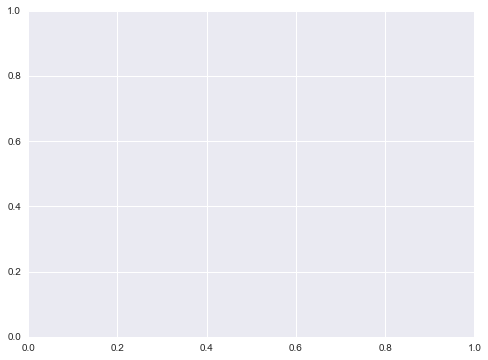

In [30]:
# Missing values

NA_values(data.Revenue)

# Distribution

print(data.Revenue.value_counts())

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax1 = data.Revenue.hist()
plt.title("Revenue - distribution")
plt.show()

# Changing 0 and 1 to TRUE and FALSE

data.Revenue.replace('0', 'FALSE', inplace=True)
data.Revenue.replace('1', 'TRUE', inplace=True)

# Converting column to boolean

mapa = {'TRUE': True, 'FALSE': False}
data['Revenue'] = data['Revenue'].map(mapa)

print(f' {round(data.Revenue.value_counts(normalize = True)[0]*100, 2)}% of data falls under FALSE category of Revenue')

### Isaac:

    - Informational_Duration: There is a 'None' value so for this reason the type is an object.. We should change it to 0 and convert all the Series to float. In terms of missing values we got it covered (0.11%). We will fill them with the mean. 0.0% of outliers.
    - PageValues. Same as Informationa_Duration, we got an object called (#Nan). We should also change it and convert all the Series to float. Same for the missing values. 0.0% of outliers.
    - Region. There are only 9 regions. There are some with 'nan' or 'Nan'. My proposal is to remove whole cell as it will end up with bad results.

In [70]:
# Informational_Duration column

data[data['Informational_Duration'] == 'None'] = 0
data["Informational_Duration"] = pd.to_numeric(data["Informational_Duration"])

NA_values(data["Informational_Duration"])
iqr(data, data["Informational_Duration"])

Column name: Informational_Duration
Total values: 12218
NA values: 112
% of NA values: 0.91%
Column: Informational_Duration
Lower outliers: all values lower than nan
Upper outliers: all values higher than nan
Total number of rows with outliers: 0
% of outliers: 0.0%


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [32]:
# PageValues column

data[data['PageValues'] == '#Nan'] = 0
data["PageValues"] = pd.to_numeric(data["PageValues"])

NA_values(data["PageValues"])
iqr(data, data["PageValues"])

Column name: PageValues
Total values: 12310
NA values: 20
% of NA values: 0.16%
Column: PageValues    nLower outliers: all values lower than nan    nUpper outliers: all values higher than nan    nTotal number of rows with outliers: 0    n% of outliers: 0.0%


In [82]:
# Region column

#data[data['Region'] == 'nan']
#data[data['Region'] == 'Nan']

#data["Region"] = pd.to_numeric(data["Region"])
data.Region.value_counts()

1      4593
3      2341
4      1151
2      1090
6       787
7       730
9       493
8       428
5       303
0       200
Nan      20
Name: Region, dtype: int64



### Pau:

    - ProductRelated:

    - SpecialDay:

    - TrafficType:


In [85]:
# ProductRelated column

# 1.09% NA --> filling method: median?:

NA_values(data.ProductRelated) 

data.ProductRelated = data.ProductRelated.fillna(data.ProductRelated.median()) 

# Outliers:

# dtype transformation: float to int

# data.ProductRelated.fillna(method='ffill')

Column name: ProductRelated
Total values: 12330
NA values: 0
% of NA values: 0.0%


In [35]:
# SpecialDay column

# 0.0% NA --> no filling needed:

NA_values(data.SpecialDay) 

# Outliers:

# dtype correct (float)


Column name: SpecialDay
Total values: 12330
NA values: 0
% of NA values: 0.0%


In [87]:
# TrafficType column

# 0.97% NA --> filling method: median?:

NA_values(data.TrafficType) 

data.TrafficType = data.TrafficType.fillna(data.TrafficType.median())

# Outliers:

# dtype transformation: float to int

data.TrafficType.value_counts()

Column name: TrafficType
Total values: 12330
NA values: 0
% of NA values: 0.0%


2.0     3989
1.0     2377
3.0     1975
4.0     1038
13.0     714
10.0     438
6.0      436
8.0      328
5.0      252
11.0     236
0.0      200
20.0     191
9.0       40
7.0       37
15.0      35
19.0      17
14.0      13
18.0       9
16.0       3
17.0       1
12.0       1
Name: TrafficType, dtype: int64

### Sosa:

    - Administrative:
        Due to the low number of missing values (0.28%), we'll fill them with the median of the values since its 
        impact won't be noticeable. We can't use mean because each value represents a category and should be
        assigned to an existing value. 
        Also, we can also see that the distribution of the values is a logarithmic one, left-skewed.
        There's 100 values 999. These are obvious errors. They're distributed evenly through the column. To
        fix this, we'll transform this 999 values into NaNs to interpolate them via a ffill, in order to preserve
        the actual distribution of the values.
        
    - ProductRelated_Duration
        In this column, we have negative values. The time of a person staying in a webpage cannot be
        negative, so we assume there's a error on the lecture. We'll be replacing them with '0' value.
        We have just two pronounced outliers. 
        Additionaly, we'll assing our NAs, 0,14% of the values, to the mean values since our continuous numeric
        values are equally distributed.
        
        
    - Month
        We have no NA values, but some wrong strings to classify the months. We'll fix this with Regex.
        No more transformation needed.
        
    - VisitorType
        We have four types of visitors: Returning, New, Other and More. In this case, we'll reduce the group
        to three types: Returning, New and Other, by merging the More column to Other.
        For the NA values, we have no way to know if the visitor is Returning or New, so we'll also group them
        with the 'Other' values.

In [88]:
## Administrative column

print(NA_values(data.Administrative))

data.Administrative = data.Administrative.fillna(data.Administrative.median())


data[data['Administrative'] == 999] = None

data.Administrative.fillna(method='ffill', inplace=True)

iqr(data, data.Administrative)



Column name: Administrative
Total values: 12330
NA values: 0
% of NA values: 0.0%
None
Column: Administrative
Lower outliers: all values lower than -6.0
Upper outliers: all values higher than 10.0
Total number of rows with outliers: 398
% of outliers: 3.23%


In [105]:
## ProductRelated_Duration column

print(NA_values(data.ProductRelated_Duration))

# Fixing outliers:

outliers = data.ProductRelated_Duration.sort_values(ascending=False)[:2]

data.query('ProductRelated_Duration == @outliers')['ProductRelated_Duration'] = data.ProductRelated_Duration.mean()

# Fixing the NA values:

data.ProductRelated_Duration = data.ProductRelated_Duration.fillna(data.ProductRelated_Duration.mean())

## ??? IQR for logarithmic distributions, are there outliers?

Column name: ProductRelated_Duration
Total values: 12330
NA values: 0
% of NA values: 0.0%
None


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [109]:
## Month column

NA_values(data.Month)

# Fixing strings:

data.Month = data.Month.str.replace('MAY', 'May').str.replace('March', 'Mar')

print(data.Month.value_counts())

print(data.Month.fillna(method='ffill').value_counts())

Column name: Month
Total values: 12032
NA values: 298
% of NA values: 2.42%
May     3295
Nov     2923
Mar     1866
Dec     1687
Oct      533
Sep      428
Aug      424
Jul      420
June     281
Feb      175
Name: Month, dtype: int64
May     3374
Nov     2991
Mar     1921
Dec     1723
Oct      548
Sep      440
Aug      432
Jul      428
June     289
Feb      184
Name: Month, dtype: int64


In [115]:
## VisitorType column

NA_values(data.VisitorType)

data.VisitorType = data.VisitorType.str.replace('More', 'Other').fillna('Other')

## ver si la columna tiene importancia, probar otras formas de tratar 'Other'

Column name: VisitorType
Total values: 12330
NA values: 0
% of NA values: 0.0%
